In [81]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import skew
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


## Data download

In [66]:
# Define tickers for tech and non-tech companies
tech_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'NVDA', 'TSLA', 'ADBE', 'INTC', 'CSCO', 'ORCL', 'IBM', 'AMD', 'NFLX', 'CRM']
non_tech_tickers = ['JNJ', 'PG', 'KO', 'PEP', 'WMT', 'COST', 'XOM', 'CVX', 'UPS', 'T', 'VZ', 'MRK', 'PFE', 'DIS', 'GE']

# Download historical price data
tickers = tech_tickers + non_tech_tickers
data = yf.download(tickers, start='2015-01-01', end='2023-01-01')['Adj Close']

data = data.dropna(axis=1)

# Calculate daily returns
returns_df = data.pct_change().dropna()

returns_df

[*********************100%***********************]  30 of 30 completed

1 Failed download:
['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker,AAPL,ADBE,AMD,AMZN,COST,CRM,CSCO,CVX,DIS,GE,...,ORCL,PEP,PFE,PG,T,TSLA,UPS,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05 00:00:00+00:00,-0.028172,-0.004976,-0.003745,-0.020517,-0.011369,-0.018062,-0.019920,-0.039972,-0.014613,-0.018356,...,-0.014024,-0.007518,-0.005426,-0.004754,-0.009448,-0.042041,-0.020022,-0.008304,-0.002910,-0.027362
2015-01-06 00:00:00+00:00,0.000094,-0.020145,-0.011278,-0.022833,0.013214,-0.016675,-0.000369,-0.000462,-0.005304,-0.021545,...,-0.010324,-0.007575,0.008344,-0.004555,0.001490,0.005664,-0.006564,0.010092,0.007706,-0.005316
2015-01-07 00:00:00+00:00,0.014022,0.008223,-0.019011,0.010600,0.017413,-0.004720,0.009242,-0.000833,0.010230,0.000415,...,0.000232,0.029241,0.013685,0.005246,0.005831,-0.001562,0.009306,-0.006453,0.026532,0.010132
2015-01-08 00:00:00+00:00,0.038423,0.025453,0.011628,0.006836,0.008592,0.029159,0.007692,0.022883,0.010342,0.012043,...,0.006025,0.018175,0.020408,0.011435,0.009949,-0.001564,0.017979,0.021433,0.021106,0.016644
2015-01-09 00:00:00+00:00,0.001072,-0.014811,0.007663,-0.011749,-0.015389,-0.007339,0.010178,-0.019926,0.004905,-0.013951,...,-0.000461,-0.006771,0.004616,-0.009331,-0.002985,-0.018802,-0.007336,-0.008903,-0.012380,-0.001409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,-0.002798,0.005735,0.010335,0.017425,0.008589,0.001935,0.003381,0.030916,0.015461,0.000245,...,0.004473,0.006461,0.003679,0.002825,0.002189,-0.017551,0.007972,0.002610,0.002021,0.026445
2022-12-27 00:00:00+00:00,-0.013878,-0.009928,-0.019374,-0.025924,-0.008970,0.009425,0.001053,0.012571,-0.018634,0.012838,...,0.001608,0.004444,-0.013506,0.008714,0.008192,-0.114089,-0.000452,0.021869,0.000278,0.013894
2022-12-28 00:00:00+00:00,-0.030685,-0.020174,-0.011064,-0.014692,-0.012018,-0.016761,-0.009678,-0.014753,-0.025472,-0.010502,...,-0.008027,-0.007210,-0.006454,-0.012926,-0.013001,0.033089,-0.018764,-0.011210,-0.017523,-0.016426


In [63]:
# Define ticker categories with a dictionary
ticker_labels = {ticker: 'tech' for ticker in tech_tickers}
ticker_labels.update({ticker: 'non-tech' for ticker in non_tech_tickers})

# Filter out tickers with missing values in returns_df, but only if the ticker is in the DataFrame
filtered_tickers = [ticker for ticker in ticker_labels.keys() if ticker in returns_df.columns and not returns_df[ticker].isna().any()]

# Filter the ticker_labels dictionary based on available tickers
filtered_labels = [ticker_labels[ticker] for ticker in filtered_tickers]


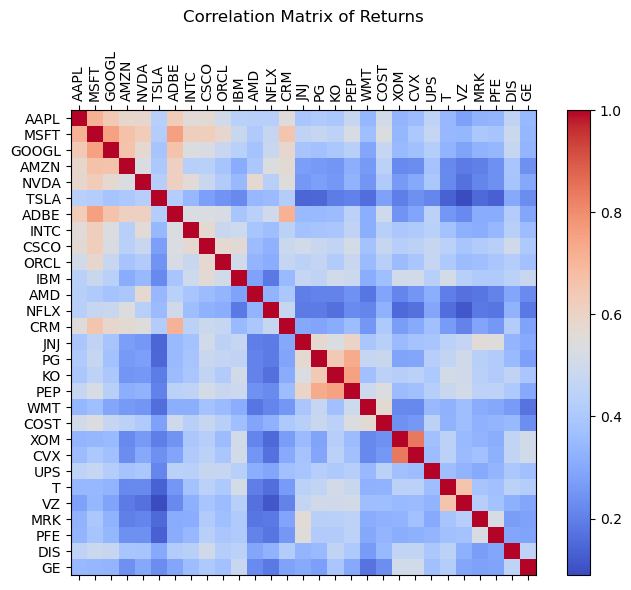

In [62]:
# Compute correlation matrix
correlation_matrix = returns_df[filtered_tickers].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Returns', pad=20)
plt.show()


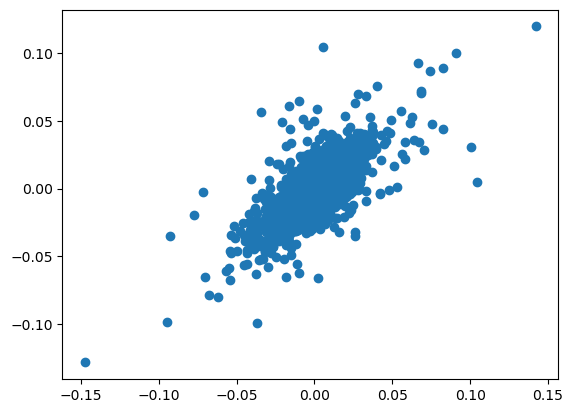

In [83]:
plt.scatter(returns_df['MSFT'],returns_df['AAPL'])

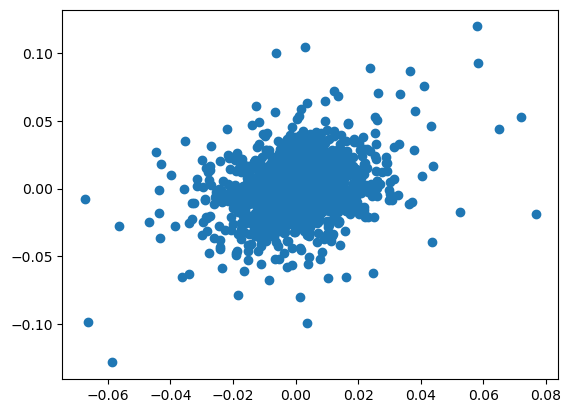

In [68]:
plt.scatter(returns_df['VZ'],returns_df['AAPL'])

In [75]:
# Feature Engineering
features = []
for ticker in filtered_tickers:
    stock_returns = returns_df[ticker]
    avg_return = stock_returns.mean()
    volatility = stock_returns.std()
    skewness = skew(stock_returns)
    features.append([avg_return, volatility, skewness])

# Create a DataFrame with the features and labels
features_df = pd.DataFrame(features, columns=['avg_return', 'volatility', 'skewness'])
features_df['label'] = filtered_labels  # Add labels as the target variable


In [76]:
# Encode target variable
features_df['label'] = features_df['label'].apply(lambda x: 1 if x == 'tech' else 0)

# Split data
X = features_df[['avg_return', 'volatility', 'skewness']]
y = features_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [77]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Probability Model (LPM)': LinearRegression()
}

In [84]:
# Cross-validation and parameter tuning
param_grids = {
    'Logistic Regression': {'C': [10, 30, 50, 100]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [2,3, 4]}
}

## Model Accuracy

In [85]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}
confusion_matrices = {}

for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    else:
        # Linear Regression (LPM) as it doesn't need parameter tuning
        best_model = model
        best_model.fit(X_train, y_train)

    # Evaluate the model
    if model_name == 'Linear Probability Model (LPM)':
        y_pred = (best_model.predict(X_test) >= 0.5).astype(int)
    else:
        y_pred = best_model.predict(X_test)
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-score'].append(f1)
    
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)


Best parameters for Logistic Regression: {'C': 10}

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.43      0.50      0.46         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12


Best parameters for K-Nearest Neighbors: {'n_neighbors': 5}

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.50      0.50      0.50         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.50      0.50      0.50        12


Best parameters for Decision Tree: {'max_depth': 4}

Classification Report for Decision Tree:
               precision    recall  f1-s


Confusion Matrices:

Confusion Matrix for Logistic Regression:
[[2 4]
 [3 3]]


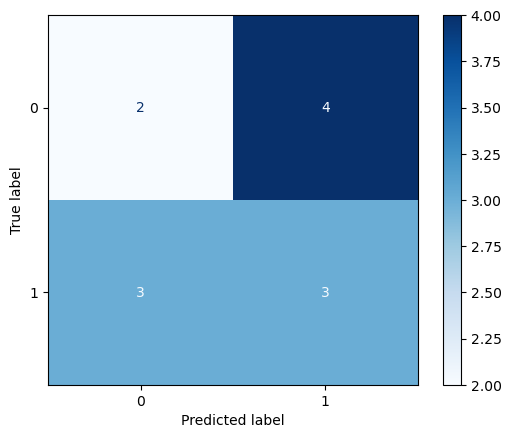


Confusion Matrix for K-Nearest Neighbors:
[[3 3]
 [3 3]]


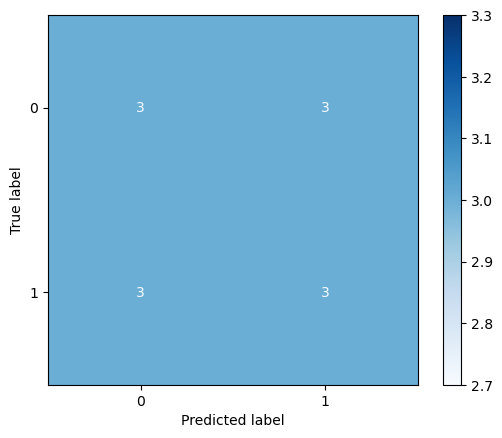


Confusion Matrix for Decision Tree:
[[4 2]
 [2 4]]


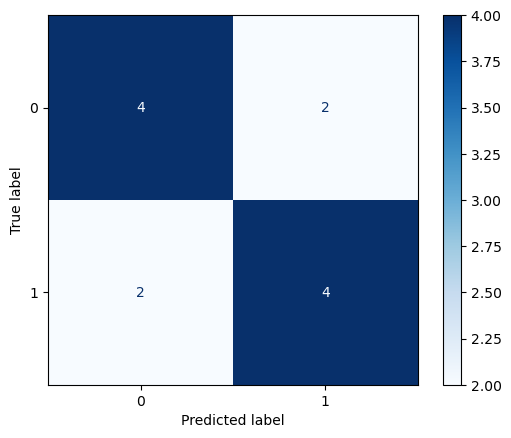


Confusion Matrix for Linear Probability Model (LPM):
[[5 1]
 [3 3]]


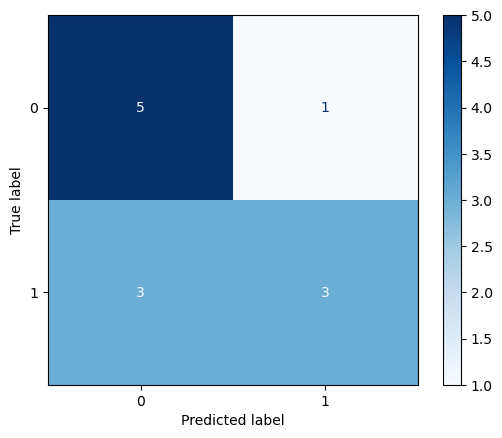

In [86]:
# Display confusion matrices
print("\nConfusion Matrices:")
for model_name, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

In [87]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.416667,0.428571,0.500000,0.461538
1,K-Nearest Neighbors,0.500000,0.500000,0.500000,0.500000
2,Decision Tree,0.666667,0.666667,0.666667,0.666667
3,Linear Probability Model (LPM),0.666667,0.750000,0.500000,0.600000


## 

## Features importance 

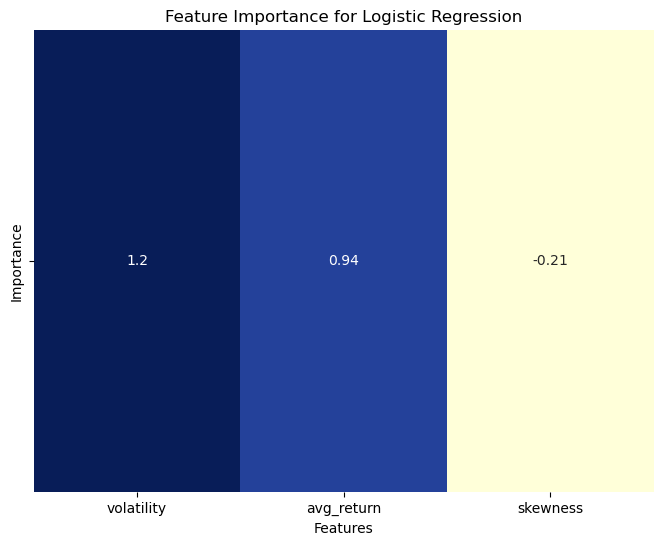

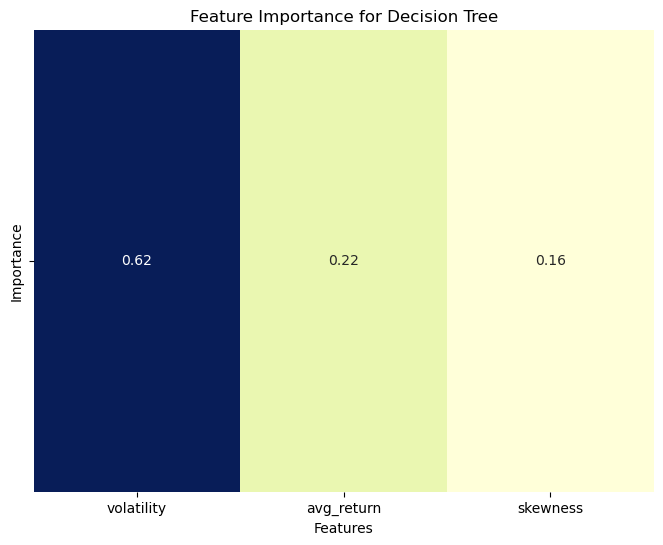

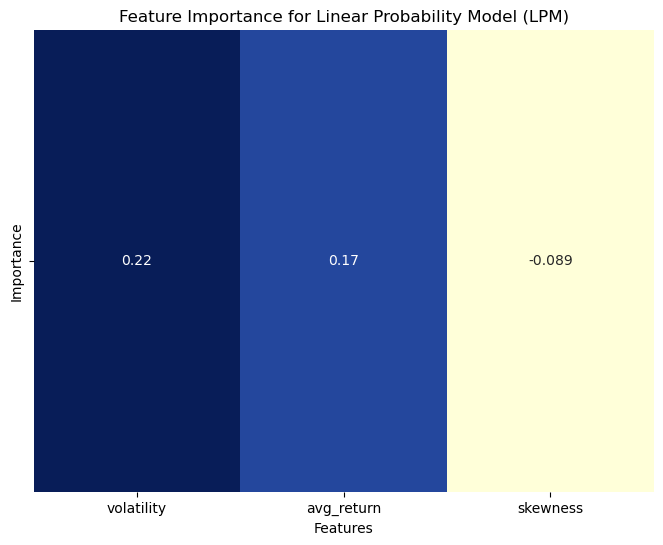

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize features for models that rely on coefficients (optional but common practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Refit models with scaled data where relevant (Logistic Regression, LPM)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Probability Model (LPM)': LinearRegression()
}

feature_names = X.columns

for model_name, model in models.items():
    # Fit the model on scaled data for logistic regression and LPM
    if model_name in ['Logistic Regression', 'Linear Probability Model (LPM)']:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    
    # Extract feature importance or coefficients
    if model_name == 'Decision Tree':
        importances = model.feature_importances_
    elif model_name == 'Logistic Regression':
        importances = model.coef_[0]
    elif model_name == 'Linear Probability Model (LPM)':
        importances = model.coef_

    # Create a DataFrame for the feature importances
    importance_df = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)
    
    # Plot heatmap for the model's feature importance
    plt.figure(figsize=(8, 6))
    sns.heatmap(importance_df.T, annot=True, cmap="YlGnBu", cbar=False)
    plt.title(f"Feature Importance for {model_name}")
    plt.xlabel("Features")
    plt.show()
